In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    plot_confusion_matrix,
)

In [3]:
from data import Veiculos

In [13]:
RANDOM_NUM = 47
random.seed(RANDOM_NUM)
np.random.seed(RANDOM_NUM)

In [14]:
df = Veiculos.get_data()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:, 1:-1],  # 1 coluna = ID
    df.iloc[:, -1],  # Remove target
    test_size=0.2,
    random_state=RANDOM_NUM,
)

## Modelo MLP

In [16]:
model = MLPClassifier(max_iter=2000, random_state=RANDOM_NUM, solver="sgd")
model.fit(X_train, y_train)
predict = model.predict(X_test)

In [17]:
model.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 2000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 47,
 'shuffle': True,
 'solver': 'sgd',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [19]:
clf = MLPClassifier(max_iter=2000, random_state=RANDOM_NUM)
model = GridSearchCV(clf, {}, n_jobs=-1, cv=10)
model.fit(X_train, y_train)
predict = model.predict(X_test)

In [20]:
accuracy = round(accuracy_score(y_test, predict), 4)
accuracy

0.6

In [21]:
model.get_params()

{'cv': 10,
 'error_score': nan,
 'estimator__activation': 'relu',
 'estimator__alpha': 0.0001,
 'estimator__batch_size': 'auto',
 'estimator__beta_1': 0.9,
 'estimator__beta_2': 0.999,
 'estimator__early_stopping': False,
 'estimator__epsilon': 1e-08,
 'estimator__hidden_layer_sizes': (100,),
 'estimator__learning_rate': 'constant',
 'estimator__learning_rate_init': 0.001,
 'estimator__max_fun': 15000,
 'estimator__max_iter': 2000,
 'estimator__momentum': 0.9,
 'estimator__n_iter_no_change': 10,
 'estimator__nesterovs_momentum': True,
 'estimator__power_t': 0.5,
 'estimator__random_state': 47,
 'estimator__shuffle': True,
 'estimator__solver': 'adam',
 'estimator__tol': 0.0001,
 'estimator__validation_fraction': 0.1,
 'estimator__verbose': False,
 'estimator__warm_start': False,
 'estimator': MLPClassifier(max_iter=2000, random_state=47),
 'iid': 'deprecated',
 'n_jobs': -1,
 'param_grid': {},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,


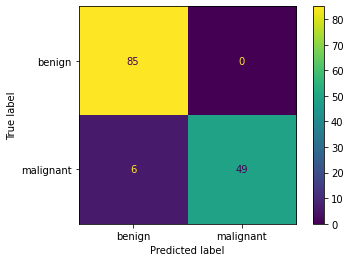

In [23]:
plot_confusion_matrix(model, X_test, y_test)